In [4]:
# Import necessary libraries|Импорт необходимых библиотек

import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
# Load the dataset|Загрузка данных
sales_data = pd.read_csv('https://raw.githubusercontent.com/sklarone/junior-data_analyst-portfolio/main/Python_Projects/sales_analysis/second_hand_sales.csv')

In [17]:
# Check first 5 lines of dataframe|Просмотрим первые 5 строк датасета
sales_data.head()

,transaction_id,datetime,store,city,channel,item_id,category,brand,condition,quantity,buy_price,sell_price
0,1,2023-07-25 19:29,SecondHand LJ,Ljubljana,Offline,163979,Shoes,H&M,Satisfactory,1,20.70,59.53
1,1,2023-07-25 19:29,SecondHand LJ,Ljubljana,Offline,755392,Shoes,Gucci,Good,1,7.58,19.35
2,1,2023-07-25 19:29,SecondHand LJ,Ljubljana,Offline,893716,Accessories,Prada,Excellent,1,25.59,58.49
3,1,2023-07-25 19:29,SecondHand LJ,Ljubljana,Offline,117697,Shoes,Zara,Satisfactory,1,10.43,15.93
4,2,2023-09-19 17:37,SecondHand LJ,Ljubljana,Offline,490667,Accessories,Nike,Excellent,1,4.35,7.04


In [18]:
# Let's check the data types|Проверим типы данных
sales_data.dtypes

transaction_id      int64
datetime           object
store              object
city               object
channel            object
item_id             int64
category           object
brand              object
condition          object
quantity            int64
buy_price         float64
sell_price        float64
dtype: object

In [19]:
# Convert the datetime column to date and time format|Преобразуем колонку datetime в формат даты и времени
sales_data["datetime"] = pd.to_datetime(sales_data["datetime"])

In [22]:
# Checking the data for a null value|Проверка данных на наличие нулевого значения
sales_data.isnull().sum()

transaction_id    0
datetime          0
store             0
city              0
channel           0
item_id           0
category          0
brand             0
condition         0
quantity          0
buy_price         0
sell_price        0
dtype: int64

In [24]:
# Check for duplicates|Проверка на дубликаты
sales_data.duplicated().sum()

0

In [95]:
# Let's take a look at the descriptive statistics|Посмотрим описательную статистику
sales_data.describe()

,transaction_id,item_id,quantity,buy_price,sell_price
count,65023.000000,65023.000000,65023.0,65023.000000,65023.000000
mean,13007.268782,550406.622857,1.0,16.508161,41.224614
std,7515.204654,259489.156962,0.0,7.778987,22.023279
min,1.000000,100014.000000,1.0,3.000000,4.640000
25%,6502.000000,326762.500000,1.0,9.730000,23.120000
50%,12986.000000,548854.000000,1.0,16.550000,39.030000
75%,19528.500000,775652.500000,1.0,23.250000,56.350000
max,26000.000000,999983.000000,1.0,30.000000,104.830000


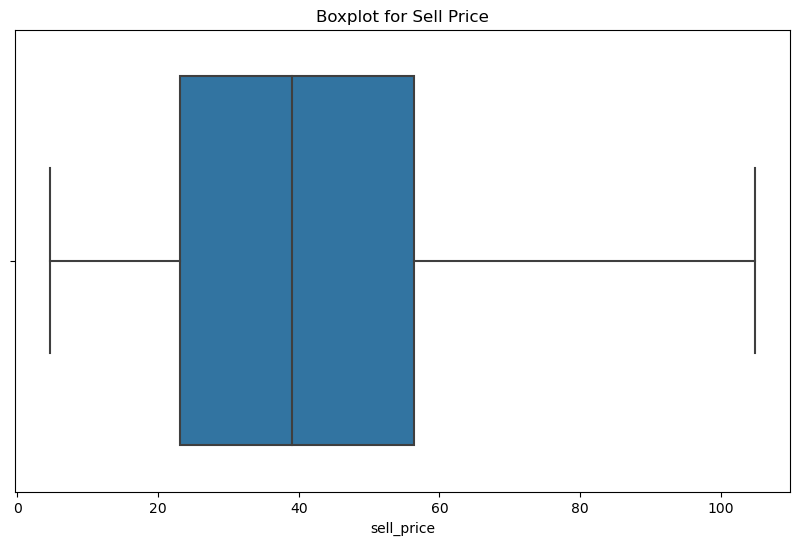

In [97]:
# Identification of price outliers|Выявление выбросов цены товаров
# Let's visually assess the scope|Визуально оценим размах
plt.figure(figsize=(10,6))
sns.boxplot(x=sales_data['sell_price'])
plt.title("Boxplot for Sell Price")
plt.show()

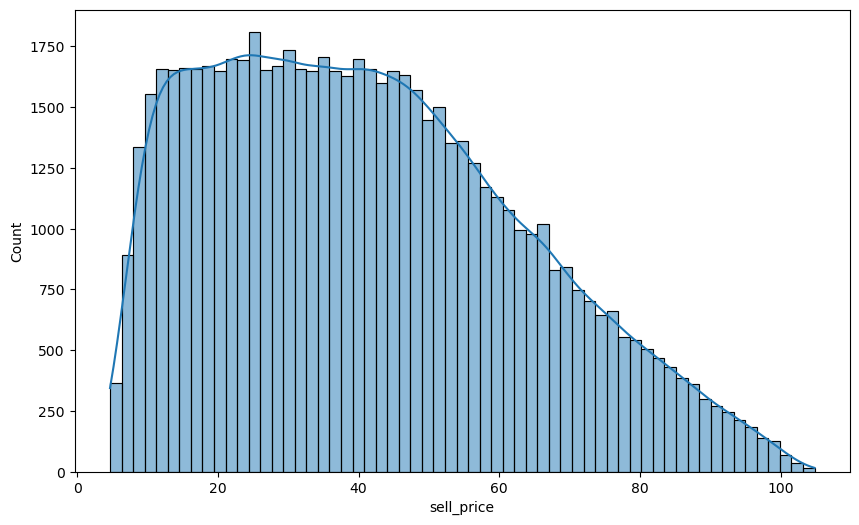

In [88]:
# Let's check the distribution for normality|Проверим распределение на нормальность
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['sell_price'], kde=True)
plt.show()

In [86]:
#We use the IQR (Interquartile Range) method to determine the outliers because the distribution is not normal.
#Воспользуемся Методом IQR (Interquartile Range) для определения выбросов, потому что распределение отлично от нормального

Q1 = sales_data['sell_price'].quantile(0.25)
Q3 = sales_data['sell_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sales_data[(sales_data['sell_price'] < lower_bound) | (sales_data['sell_price'] > upper_bound)]
outliers

,transaction_id,datetime,store,city,channel,item_id,category,brand,condition,quantity,buy_price,sell_price,month


In [48]:
# 1. General business statistics|Общая статистика бизнеса
stats_data = {
    "Metric": ["Total orders", "Total sold amount", "Revenue", "AOV", "Average margin"],
    "Value": [
             sales_data["transaction_id"].nunique(),
             sales_data.shape[0],
             round(sales_data["sell_price"].sum(),2),
             round(sales_data.groupby("transaction_id")["sell_price"].sum().mean(),2),
             round(((sales_data["sell_price"] - sales_data["buy_price"]) / sales_data["buy_price"]).mean(),2)
    ]
}
stats_df = pd.DataFrame(stats_data)
stats_df

,Metric,Value
0,Total orders,26000.00
1,Total sold amount,65023.00
2,Revenue,2680548.06
3,AOV,103.10
4,Average margin,1.50


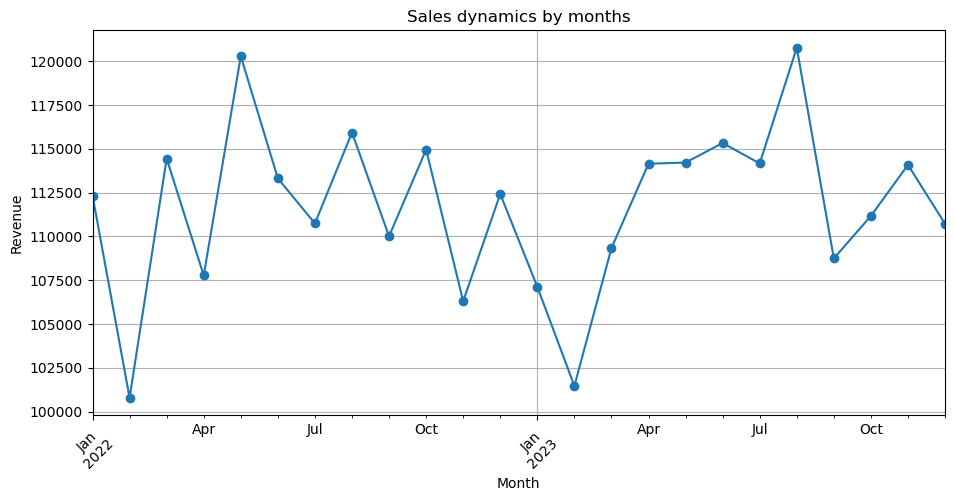

In [51]:
# 2. Analysis of sales dynamics by month|Анализ динамики продаж по месяцам
sales_data["month"]    = sales_data["datetime"].dt.to_period("M")
sales_trend            = sales_data.groupby("month")["sell_price"].sum()

plt.figure(figsize     = (11, 5))
sales_trend.plot(title = "Sales dynamics by months", marker="o")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation    = 45)
plt.grid()
plt.show()

In [78]:
# 3.Analysis of sales by city|Анализ продаж по городам

city_sales = sales_data.groupby("city", as_index=False)\
                       .agg({"sell_price":'sum'})\
                       .sort_values('sell_price',ascending=False)\
                       .rename(columns={'sell_price':'Revenue','city':'City'})
fig = px.bar(city_sales, x="City", y="Revenue", title="Analysis of sales by city", color="City", 
             color_discrete_sequence=px.colors.sequential.Inferno)
fig.update_layout(showlegend=False)
fig.show()

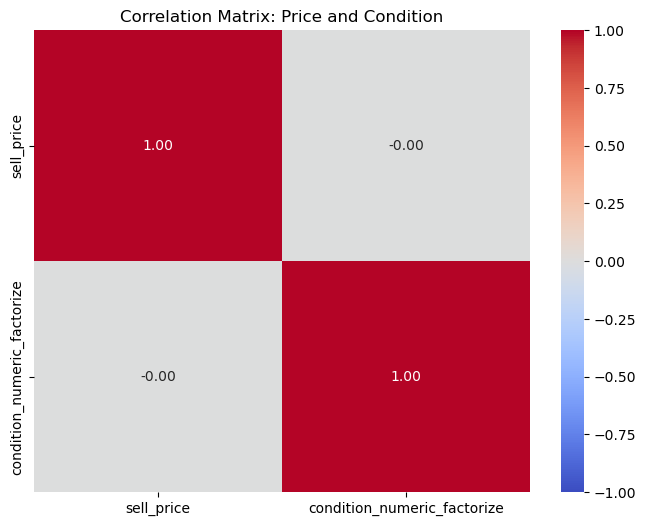

In [111]:
#Let's evaluate the correlation between price and quality|Оценим корреляцию между ценой и качеством
sales_data['condition_numeric_factorize'], unique_values = pd.factorize(sales_data['condition'])

#quality_map = {'Satisfactory': 1, 'Good': 2, 'Excellent': 3}
#sales_data['condition_numeric'] = sales_data['condition'].map(quality_map)


correlation_matrix = sales_data[['sell_price', 'condition_numeric_factorize']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix: Price and Condition")
plt.show()